# US Cafe' Stores Sales Analysis

## Table of Contents

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [52]:
#Create path
path = r'/Users/rusamijan/04-2023 US Stores Sales Analysis'

In [53]:
#Import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'sales_cleaned.pkl'))

### Data cleaning

In [54]:
df.columns

Index(['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales', 'Date',
       'Product Type', 'Product', 'Type'],
      dtype='object')

In [55]:
df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2010-01-04,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2010-01-07,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2010-01-11,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2010-01-12,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2011-01-07,Coffee,Columbian,Regular


In [56]:
df.shape

(4248, 19)

##### Missing values

In [57]:
# check for missing values
df.isnull().sum()

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
Date              0
Product Type      0
Product           0
Type              0
dtype: int64

In [58]:
dups = df.duplicated()
dups.shape # No dups

(4248,)

##### Extreme values checks

/Users/rusamijan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

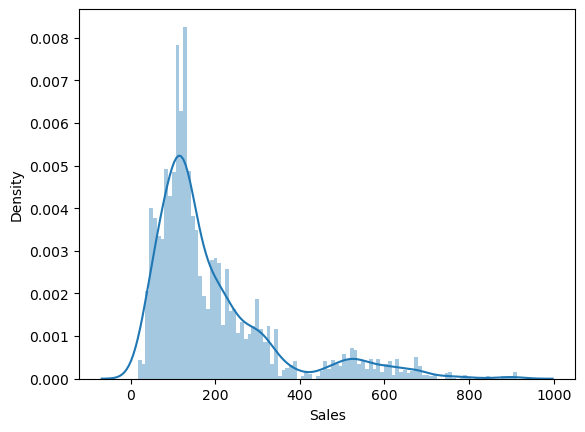

In [59]:
# extreme value check
sns.distplot(df['Sales'], bins=100) # Shows extreme values

In [60]:
df['Sales'].mean() # Check the mean

192.98752354048963

In [61]:
df['Sales'].median() # Check the median

138.0

In [62]:
df['Sales'].max() # Check the max

912.0

In [63]:
## Data prep for regression analysis 

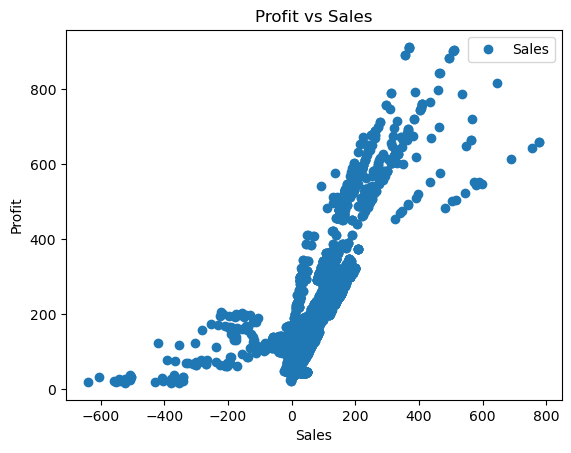

In [64]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Profit', y='Sales',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Profit vs Sales')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()

In [65]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Profit'].values.reshape(-1,1)
y = df['Sales'].values.reshape(-1,1)

In [66]:
X

array([[107.],
       [ 75.],
       [122.],
       ...,
       [ -3.],
       [  1.],
       [  4.]])

In [67]:
y

array([[292.],
       [225.],
       [325.],
       ...,
       [131.],
       [160.],
       [153.]])

In [68]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [69]:
### Regression analysis

In [70]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [71]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [72]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

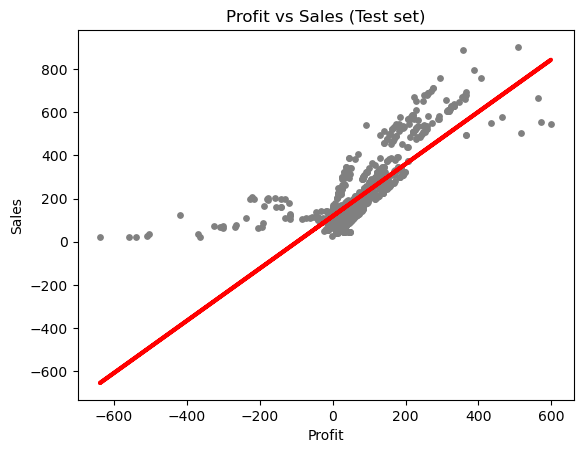

In [73]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Profit vs Sales (Test set)')
plot_test.xlabel('Profit')
plot_test.ylabel('Sales')
plot_test.show()

In [74]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [75]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.20936638]]
Mean squared error:  8833.17881758331
R2 score:  0.6000529442360674


In [76]:
y_predicted

array([[ 64.92069956],
       [289.86284662],
       [174.97304033],
       ...,
       [322.51573893],
       [243.9069241 ],
       [155.62317822]])

In [77]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,115.0,64.920700
1,283.0,289.862847
2,46.0,174.973040
3,86.0,171.344941
4,250.0,142.320148
5,123.0,195.532269
6,346.0,287.444114
7,245.0,225.766428
8,155.0,121.760920
9,452.0,310.422075


##### Compare how the regression fits the training set

In [78]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [79]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [80]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.20936638]]
Mean squared error:  8107.694544475579
R2 score:  0.649888432083068


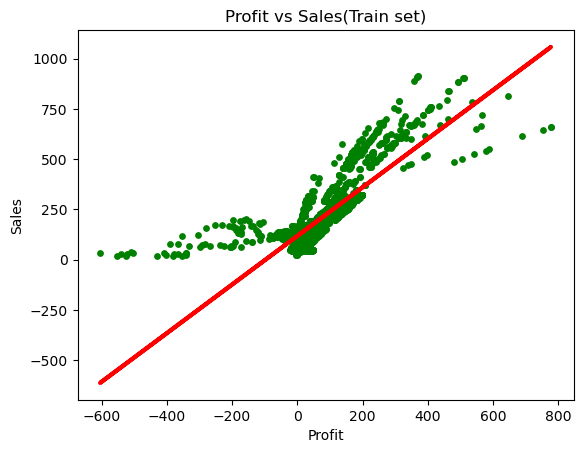

In [81]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Profit vs Sales(Train set)')
plot_test.xlabel('Profit')
plot_test.ylabel('Sales')
plot_test.show()

#### Bonus: performance improvement after removing outliers

In [82]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['Sales'] >=100] 

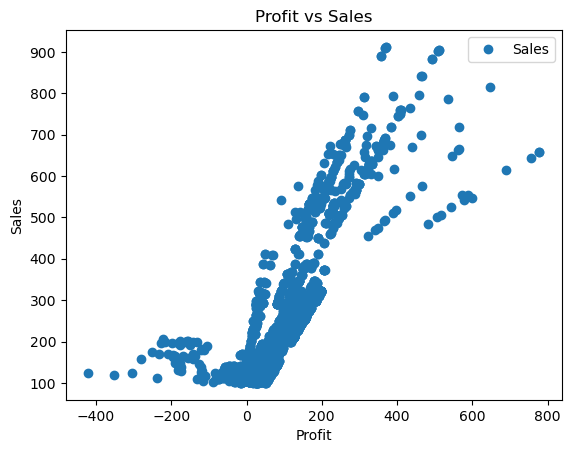

In [83]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Profit', y='Sales', style='o')  
plt.title('Profit vs Sales')  
plt.xlabel('Profit')  
plt.ylabel('Sales')  
plt.show()

In [84]:
# Reshape again.

X_2 = df_test['Profit'].values.reshape(-1,1)
y_2 = df_test['Sales'].values.reshape(-1,1)

In [85]:
# Splitting data into a train set and a test set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [86]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [87]:
# Creating predictions based on X values from test set
y_predicted_2 = regression.predict(X_test_2)

In [88]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.33291958]]
Mean squared error:  8107.694544475579
R2 score:  0.649888432083068


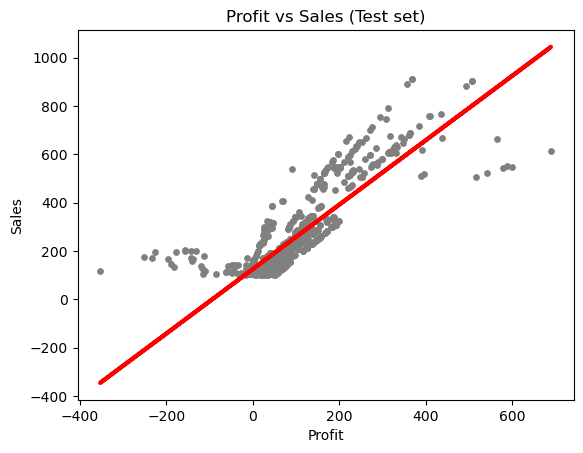

In [89]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Profit vs Sales (Test set)')
plot_test.xlabel('Profit')
plot_test.ylabel('Sales')
plot_test.show()

In [90]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,169.0,165.736039
1,188.0,239.046616
2,132.0,-118.175831
3,567.0,405.661563
4,102.0,171.067717
5,114.0,180.398154
6,142.0,171.067717
7,153.0,240.379536
8,119.0,185.729833
9,267.0,260.373329


There is a medium relaitonship between variables. The number that represents the Sales increase then Profit also increase. 